# **Survival of the FITtest**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Get  Dataset

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
X = data.data
y = data.target

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Feature Importance by Linear Regression')

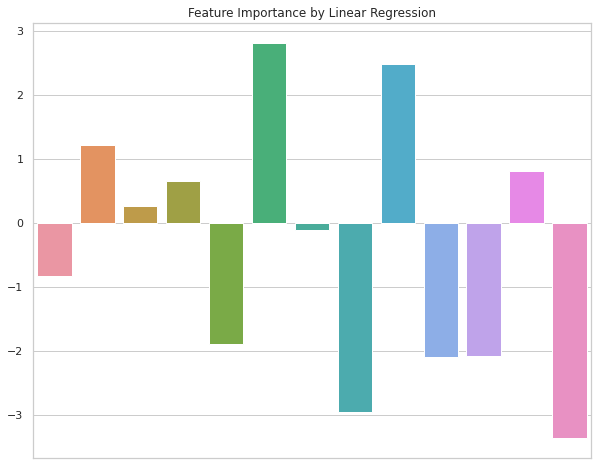

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
importance = model.coef_
# summarize importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot importance
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.barplot([x for x in range(len(importance))], importance, ax=ax)
g.set_xticklabels([])
sns.set_style("whitegrid")
g.set_title("Feature Importance by Linear Regression")



In [ ]:
type(importance)

numpy.ndarray

In [ ]:
n = 5
indices = (-abs(importance)).argsort()[:n]
print(indices)

[12  7  5  8  9]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_train.shape

(455, 13)

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred)
print(X_train.shape, error)

(455, 13) 26.339101651361787


In [ ]:
model = LinearRegression()
model.fit(X_train[:, indices], y_train)
y_pred = model.predict(X_test[:, indices])
error = mean_squared_error(y_test, y_pred)
print(X_train[:, indices].shape, error)

(455, 5) 31.852393607628585
